Name : Sanjeev Kumar Khatri

Roll no : 23

Group : CS

Assignment : 06

Githublink : https://github.com/darkamgel/machinelearning-LAB


Practical Assignment - 6

1. Artificial Neural Networks 
2. Building a Perceptron based classifier Constructing a 
single layer neural network 
3. Constructing a multilayer neural network Building a 
vector quantizer 
4. Analyzing sequential data using recurrent neural 
networks 
5. Visualizing characters in an Optical Character 
6. Recognition Building an Optical Character 
7. Recognition Engine 
8. Recurrent Neural Network 
9. Long Short-Term Memory (LSTM) 
10. Transfer Learning

### Perceptron Classifier

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl

In [ ]:
text = np.loadtxt('data_perceptron.txt')

In [ ]:
data = text[:, :2]
labels = text[:, 2].reshape((text.shape[0], 1))

Text(0.5, 1.0, 'Input data')

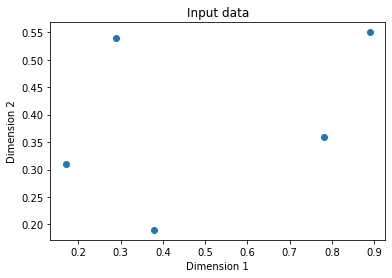

In [ ]:
plt.figure()
plt.scatter(data[:,0], data[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Input data')

In [ ]:
dim1_min, dim1_max, dim2_min, dim2_max = 0, 1, 0, 1

In [ ]:
num_output = labels.shape[1]

In [ ]:
dim1 = [dim1_min, dim1_max]
dim2 = [dim2_min, dim2_max]
perceptron = nl.net.newp([dim1, dim2], num_output)

In [ ]:
error_progress = perceptron.train(data, labels, epochs=100, show=20, lr=0.03)

The goal of learning is reached


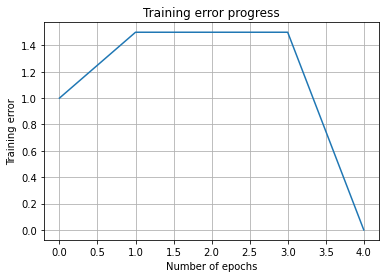

In [ ]:
plt.figure()
plt.plot(error_progress)
plt.xlabel('Number of epochs')
plt.ylabel('Training error')
plt.title('Training error progress')
plt.grid()

plt.show()

### Simple Neural Network

In [ ]:
text = np.loadtxt('data_simple_nn.txt')

In [ ]:
data = text[:, 0:2]
labels = text[:, 2:]

Text(0.5, 1.0, 'Input data')

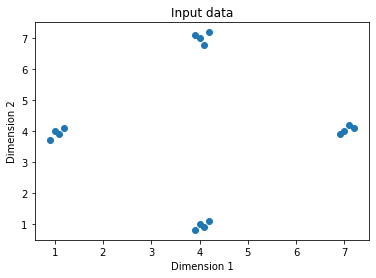

In [ ]:
plt.figure()
plt.scatter(data[:,0], data[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Input data')

In [ ]:
dim1_min, dim1_max = data[:,0].min(), data[:,0].max()
dim2_min, dim2_max = data[:,1].min(), data[:,1].max()

In [ ]:
num_output = labels.shape[1]

In [ ]:
dim1 = [dim1_min, dim1_max]
dim2 = [dim2_min, dim2_max]
nn = nl.net.newp([dim1, dim2], num_output)

In [ ]:
error_progress = nn.train(data, labels, epochs=100, show=20, lr=0.03)

Epoch: 20; Error: 4.0;
Epoch: 40; Error: 4.0;
Epoch: 60; Error: 4.0;
Epoch: 80; Error: 4.0;
Epoch: 100; Error: 4.0;
The maximum number of train epochs is reached


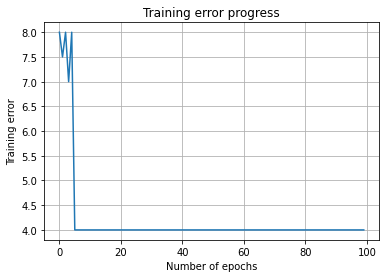

In [ ]:
plt.figure()
plt.plot(error_progress)
plt.xlabel('Number of epochs')
plt.ylabel('Training error')
plt.title('Training error progress')
plt.grid()

plt.show()

In [ ]:
print('\nTest results:')
data_test = [[0.4, 4.3], [4.4, 0.6], [4.7, 8.1]]
for item in data_test:
    print(item, '-->', nn.sim([item])[0])


Test results:
[0.4, 4.3] --> [0. 0.]
[4.4, 0.6] --> [1. 0.]
[4.7, 8.1] --> [1. 1.]


### Multilayer Neural Network

In [ ]:
min_val = -15
max_val = 15
num_points = 130
x = np.linspace(min_val, max_val, num_points)
y = 3 * np.square(x) + 5
y /= np.linalg.norm(y)

In [ ]:
data = x.reshape(num_points, 1)
labels = y.reshape(num_points, 1)

Text(0.5, 1.0, 'Input data')

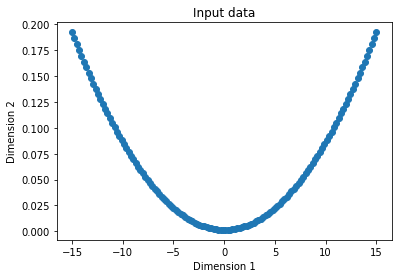

In [ ]:
plt.figure()
plt.scatter(data, labels)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Input data')

In [ ]:
nn = nl.net.newff([[min_val, max_val]], [10, 6, 1])

In [ ]:
nn.trainf = nl.train.train_gd

In [ ]:
error_progress = nn.train(data, labels, epochs=2000, show=100, goal=0.01)

Epoch: 100; Error: 0.016271863366214813;
The goal of learning is reached


In [ ]:
output = nn.sim(data)
y_pred = output.reshape(num_points)

Text(0.5, 1.0, 'Training error progress')

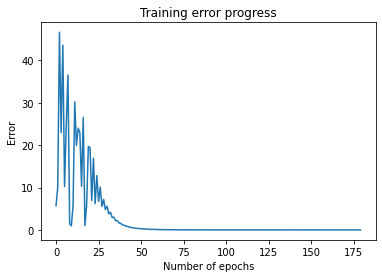

In [ ]:
plt.figure()
plt.plot(error_progress)
plt.xlabel('Number of epochs')
plt.ylabel('Error')
plt.title('Training error progress')

In [ ]:
x_dense = np.linspace(min_val, max_val, num_points * 2)
y_dense_pred = nn.sim(x_dense.reshape(x_dense.size,1)).reshape(x_dense.size)

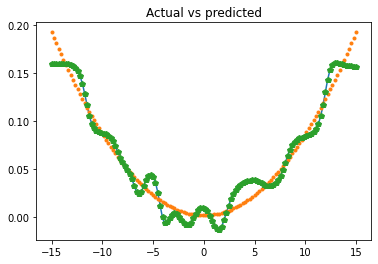

In [ ]:
plt.figure()
plt.plot(x_dense, y_dense_pred, '-', x, y, '.', x, y_pred, 'p')
plt.title('Actual vs predicted')

plt.show()

### RNN

Epoch: 100; Error: 0.8200189424737971;
Epoch: 200; Error: 0.4913509954107294;
Epoch: 300; Error: 0.12556230912984695;
Epoch: 400; Error: 0.3617425438438355;
Epoch: 500; Error: 0.1165803367467904;
Epoch: 600; Error: 0.05816942911129123;
Epoch: 700; Error: 0.12966939644310432;
Epoch: 800; Error: 0.08684811302926251;
Epoch: 900; Error: 0.7966416090525865;
Epoch: 1000; Error: 0.05539337912145299;
Epoch: 1100; Error: 0.1917773064883325;
Epoch: 1200; Error: 0.07094640927223625;
The maximum number of train epochs is reached


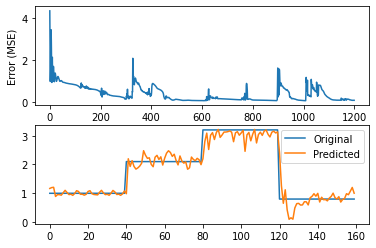

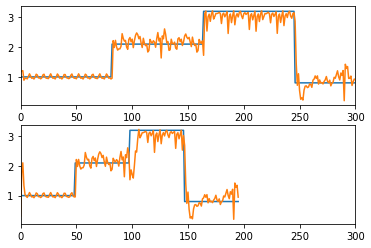

In [ ]:
def get_data(num_points):
    # Create sine waveforms
    wave_1 = 0.5 * np.sin(np.arange(0, num_points))
    wave_2 = 3.6 * np.sin(np.arange(0, num_points))
    wave_3 = 1.1 * np.sin(np.arange(0, num_points))
    wave_4 = 4.7 * np.sin(np.arange(0, num_points))

    amp_1 = np.ones(num_points)
    amp_2 = 2.1 + np.zeros(num_points) 
    amp_3 = 3.2 * np.ones(num_points) 
    amp_4 = 0.8 + np.zeros(num_points) 

    wave = np.array([wave_1, wave_2, wave_3, wave_4]).reshape(num_points * 4, 1)
    amp = np.array([[amp_1, amp_2, amp_3, amp_4]]).reshape(num_points * 4, 1)

    return wave, amp 


def visualize_output(nn, num_points_test):
    wave, amp = get_data(num_points_test)
    output = nn.sim(wave)
    plt.plot(amp.reshape(num_points_test * 4))
    plt.plot(output.reshape(num_points_test * 4))

if __name__=='__main__':

    num_points = 40
    wave, amp = get_data(num_points)


    nn = nl.net.newelm([[-2, 2]], [10, 1], [nl.trans.TanSig(), nl.trans.PureLin()])


    nn.layers[0].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
    nn.layers[1].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
    nn.init()

    error_progress = nn.train(wave, amp, epochs=1200, show=100, goal=0.01)

    output = nn.sim(wave)

    plt.subplot(211)
    plt.plot(error_progress)
    plt.xlabel('Number of epochs')
    plt.ylabel('Error (MSE)')

    plt.subplot(212)
    plt.plot(amp.reshape(num_points * 4))
    plt.plot(output.reshape(num_points * 4))
    plt.legend(['Original', 'Predicted'])

    plt.figure()

    plt.subplot(211)
    visualize_output(nn, 82)
    plt.xlim([0, 300])

    plt.subplot(212)
    visualize_output(nn, 49)
    plt.xlim([0, 300])

    plt.show()

### OCR

In [ ]:
input_file = 'letter.data'

num_datapoints = 50

orig_labels = 'omandig'

num_orig_labels = len(orig_labels)

num_train = int(0.9 * num_datapoints)
num_test = num_datapoints - num_train

start = 6
end = -1

data = []
labels = []
with open(input_file, 'r') as f:
    for line in f.readlines():

        list_vals = line.split('\t')

        if list_vals[1] not in orig_labels:
            continue

        label = np.zeros((num_orig_labels, 1))
        label[orig_labels.index(list_vals[1])] = 1
        labels.append(label)

        cur_char = np.array([float(x) for x in list_vals[start:end]])
        data.append(cur_char)

        if len(data) >= num_datapoints:
            break

data = np.asfarray(data)
labels = np.array(labels).reshape(num_datapoints, num_orig_labels)

num_dims = len(data[0])

nn = nl.net.newff([[0, 1] for _ in range(len(data[0]))], 
        [128, 16, num_orig_labels])

nn.trainf = nl.train.train_gd

error_progress = nn.train(data[:num_train,:], labels[:num_train,:], 
        epochs=10000, show=100, goal=0.01)

print('\nTesting on unknown data:')
predicted_test = nn.sim(data[num_train:, :])
for i in range(num_test):
    print('\nOriginal:', orig_labels[np.argmax(labels[i])])
    print('Predicted:', orig_labels[np.argmax(predicted_test[i])])

Epoch: 100; Error: 52.06010888161946;
Epoch: 200; Error: 44.27803047349475;
Epoch: 300; Error: 19.617329989000304;
Epoch: 400; Error: 19.55870255696333;
Epoch: 500; Error: 18.256773821603065;
Epoch: 600; Error: 7.437341846630048;
Epoch: 700; Error: 5.189487089431291;
Epoch: 800; Error: 4.479322693049156;
Epoch: 900; Error: 3.8594015559963655;
Epoch: 1000; Error: 5.129813689022471;
Epoch: 1100; Error: 4.484831579858772;
Epoch: 1200; Error: 4.294682056409995;
Epoch: 1300; Error: 4.192645427696161;
Epoch: 1400; Error: 4.129397409259914;
Epoch: 1500; Error: 4.080148128690024;
Epoch: 1600; Error: 4.036749267172816;
Epoch: 1700; Error: 3.9959391987418393;
Epoch: 1800; Error: 3.9553892316594155;
Epoch: 1900; Error: 3.912003822448483;
Epoch: 2000; Error: 3.8587848023587465;
Epoch: 2100; Error: 3.773414763913183;
Epoch: 2200; Error: 3.594129383246681;
Epoch: 2300; Error: 3.3119442046514886;
Epoch: 2400; Error: 4.701792026668626;
Epoch: 2500; Error: 3.907760939137487;
Epoch: 2600; Error: 3.56672

### Vector Quantizer

In [ ]:
text = np.loadtxt('data_vector_quantization.txt')

In [ ]:
data = text[:, 0:2]
labels = text[:, 2:]

In [ ]:
num_input_neurons = 10
num_output_neurons = 4
weights = [1/num_output_neurons] * num_output_neurons
nn = nl.net.newlvq(nl.tool.minmax(data), num_input_neurons, weights)

Epoch: 100; Error: 0.0;
Epoch: 200; Error: 0.0;
Epoch: 300; Error: 0.0;
Epoch: 400; Error: 0.0;
Epoch: 500; Error: 0.0;
The maximum number of train epochs is reached


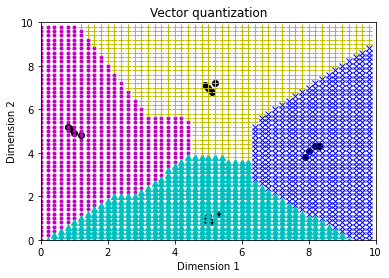

In [ ]:
_ = nn.train(data, labels, epochs=500, goal=-1)

xx, yy = np.meshgrid(np.arange(0, 10, 0.2), np.arange(0, 10, 0.2))
xx.shape = xx.size, 1
yy.shape = yy.size, 1
grid_xy = np.concatenate((xx, yy), axis=1)

grid_eval = nn.sim(grid_xy)


class_1 = data[labels[:,0] == 1]
class_2 = data[labels[:,1] == 1]
class_3 = data[labels[:,2] == 1]
class_4 = data[labels[:,3] == 1]

grid_1 = grid_xy[grid_eval[:,0] == 1]
grid_2 = grid_xy[grid_eval[:,1] == 1]
grid_3 = grid_xy[grid_eval[:,2] == 1]
grid_4 = grid_xy[grid_eval[:,3] == 1]

plt.plot(class_1[:,0], class_1[:,1], 'ko', 
        class_2[:,0], class_2[:,1], 'ko', 
        class_3[:,0], class_3[:,1], 'ko', 
        class_4[:,0], class_4[:,1], 'ko')
plt.plot(grid_1[:,0], grid_1[:,1], 'm.',
        grid_2[:,0], grid_2[:,1], 'bx',
        grid_3[:,0], grid_3[:,1], 'c^', 
        grid_4[:,0], grid_4[:,1], 'y+')
plt.axis([0, 10, 0, 10])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Vector quantization')

plt.show()

### Transfer Learning

In [ ]:
np.random.seed(2017)  

from keras.datasets import mnist
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.python.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.python.keras.utils import np_utils
from tensorflow.python.keras import backend as K

In [ ]:
batch_size = 128
nb_classes = 5
nb_epoch = 5

img_rows, img_cols = 28, 28

nb_filters = 32

pool_size = 2

kernel_size = 3

input_shape = (img_rows, img_cols, 1)

In [ ]:

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train_lt5 = X_train[y_train < 5]
y_train_lt5 = y_train[y_train < 5]
X_test_lt5 = X_test[y_test < 5]
y_test_lt5 = y_test[y_test < 5]

X_train_gte5 = X_train[y_train >= 5]
y_train_gte5 = y_train[y_train >= 5] - 5  
X_test_gte5 = X_test[y_test >= 5]         
y_test_gte5 = y_test[y_test >= 5] - 5

In [ ]:
def train_model(model, train, test, nb_classes):
    X_train = train[0].reshape((train[0].shape[0],) + input_shape)
    X_test = test[0].reshape((test[0].shape[0],) + input_shape)
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255
    X_test /= 255
    print('X_train shape:', X_train.shape)
    print(X_train.shape[0], 'train samples')
    print(X_test.shape[0], 'test samples')

    Y_train = np_utils.to_categorical(train[1], nb_classes)
    Y_test = np_utils.to_categorical(test[1], nb_classes)

    model.compile(loss='categorical_crossentropy',
                  optimizer='adadelta',
                  metrics=['accuracy'])

    model.fit(X_train, Y_train,
              batch_size=batch_size, epochs=nb_epoch,
              verbose=1,
              validation_data=(X_test, Y_test))
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])

In [ ]:
feature_layers = [
    Convolution2D(nb_filters, kernel_size, kernel_size,
                  padding='valid',
                  input_shape=input_shape),
    Activation('relu'),
    Convolution2D(nb_filters, kernel_size, kernel_size),
    Activation('relu'),
    MaxPooling2D(pool_size=(pool_size, pool_size)),
    Dropout(0.25),
    Flatten(),
]
classification_layers = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(nb_classes),
    Activation('softmax')
]

model = Sequential(feature_layers + classification_layers)

train_model(model, (X_train_lt5, y_train_lt5), (X_test_lt5, y_test_lt5), nb_classes)

X_train shape: (30596, 28, 28, 1)
30596 train samples
5139 test samples
Epoch 1/5
240/240 [==============================] - 2s 7ms/step - loss: 1.6180 - accuracy: 0.1921 - val_loss: 1.6145 - val_accuracy: 0.1969
Epoch 2/5
240/240 [==============================] - 1s 6ms/step - loss: 1.6165 - accuracy: 0.1931 - val_loss: 1.6133 - val_accuracy: 0.1981
Epoch 3/5
240/240 [==============================] - 1s 5ms/step - loss: 1.6152 - accuracy: 0.1958 - val_loss: 1.6121 - val_accuracy: 0.1985
Epoch 4/5
240/240 [==============================] - 1s 6ms/step - loss: 1.6139 - accuracy: 0.1969 - val_loss: 1.6109 - val_accuracy: 0.1996
Epoch 5/5
240/240 [==============================] - 1s 6ms/step - loss: 1.6129 - accuracy: 0.1983 - val_loss: 1.6097 - val_accuracy: 0.2000
Test score: 1.6097229719161987
Test accuracy: 0.20003892481327057


In [ ]:
for layer in feature_layers:
    layer.trainable = False
train_model(model, (X_train_gte5, y_train_gte5), (X_test_gte5, y_test_gte5), nb_classes)

X_train shape: (29404, 28, 28, 1)
29404 train samples
4861 test samples
Epoch 1/5
230/230 [==============================] - 1s 4ms/step - loss: 1.6129 - accuracy: 0.1925 - val_loss: 1.6100 - val_accuracy: 0.1938
Epoch 2/5
230/230 [==============================] - 1s 3ms/step - loss: 1.6121 - accuracy: 0.1988 - val_loss: 1.6096 - val_accuracy: 0.1950
Epoch 3/5
230/230 [==============================] - 1s 3ms/step - loss: 1.6123 - accuracy: 0.1992 - val_loss: 1.6093 - val_accuracy: 0.1967
Epoch 4/5
230/230 [==============================] - 1s 3ms/step - loss: 1.6123 - accuracy: 0.1986 - val_loss: 1.6089 - val_accuracy: 0.1983
Epoch 5/5
230/230 [==============================] - 1s 3ms/step - loss: 1.6117 - accuracy: 0.1995 - val_loss: 1.6086 - val_accuracy: 0.1991
Test score: 1.6085554361343384
Test accuracy: 0.19913597404956818


### LSTM

In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.utils import pad_sequences


max_features = 20000
maxlen = 80  
batch_size = 32

print('Loading data...')
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=max_features)
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (samples x time)')
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
X_train shape: (25000, 80)
X_test shape: (25000, 80)


In [ ]:
from keras.layers import Dense, Activation, Embedding
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 128))
model.add(Dropout(0.2))
model.add(LSTM(128, dropout=0.2)) 
model.add(Dense(1))
model.add(Activation('sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, batch_size=batch_size, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
782/782 [==============================] - 92s 115ms/step - loss: 0.4379 - accuracy: 0.7884 - val_loss: 0.3646 - val_accuracy: 0.8413
Epoch 2/5
782/782 [==============================] - 88s 113ms/step - loss: 0.2625 - accuracy: 0.8933 - val_loss: 0.3959 - val_accuracy: 0.8303
Epoch 3/5
782/782 [==============================] - 90s 114ms/step - loss: 0.1771 - accuracy: 0.9328 - val_loss: 0.4171 - val_accuracy: 0.8262
Epoch 4/5
782/782 [==============================] - 94s 120ms/step - loss: 0.1202 - accuracy: 0.9568 - val_loss: 0.5060 - val_accuracy: 0.8277
Epoch 5/5
782/782 [==============================] - 93s 119ms/step - loss: 0.0807 - accuracy: 0.9714 - val_loss: 0.5931 - val_accuracy: 0.8280


In [ ]:
train_score, train_acc = model.evaluate(X_train, y_train, batch_size=batch_size)
test_score, test_acc = model.evaluate(X_test, y_test, batch_size=batch_size)

print ('Train score:', train_score)
print ('Train accuracy:', train_acc)

print ('Test score:', test_score)
print ('Test accuracy:', test_acc)

782/782 [==============================] - 19s 24ms/step - loss: 0.5931 - accuracy: 0.8280
Train score: 0.04113420471549034
Train accuracy: 0.9880399703979492
Test score: 0.593148410320282
Test accuracy: 0.8279600143432617
